In [1]:
import sys
sys.path.append('../training_performance')

import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read

from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du

from plot_trials_info import *
from plot_days_info import *

import seaborn as sns
import pandas as pd
# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

[2023-08-28 20:34:49,531][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2023-08-28 20:34:51,608][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [20]:
animals = [
    "R010",
    "R011",
    "R012",
    "R013",
    "R014",
    "R015",
    "R512",
    "R513",
    "R621",
    "R622",
    "R623",
    "R624",
]

df = create_trials_df_from_dj(animal_ids=animals)
# mouse_df = create_trials_df_from_dj(animal_ids=mice)

fetched 15 sessions for R010 between 2023-08-13 and 2023-08-28
fetched 15 sessions for R011 between 2023-08-13 and 2023-08-28
fetched 15 sessions for R012 between 2023-08-13 and 2023-08-28
fetched 37 sessions for R013 between 2023-07-14 and 2023-08-28
fetched 37 sessions for R014 between 2023-07-14 and 2023-08-28
fetched 37 sessions for R015 between 2023-07-14 and 2023-08-28
fetched 40 sessions for R512 between 2023-07-12 and 2023-08-28
fetched 39 sessions for R513 between 2023-07-12 and 2023-08-28
fetched 27 sessions for R621 between 2023-07-26 and 2023-08-28
fetched 27 sessions for R622 between 2023-07-26 and 2023-08-28
fetched 26 sessions for R623 between 2023-07-26 and 2023-08-28
fetched 27 sessions for R624 between 2023-07-26 and 2023-08-28


In [45]:
# Create a dictionary mapping animal_id to species
rats = ["R010", "R011", "R012", "R013", "R014", "R015"]
mice = ["R512", "R513", "R621", "R622", "R623", "R624"]
animal_to_species = {}
for rat in rats:
    animal_to_species[rat] = "rats"
for mouse in mice:
    animal_to_species[mouse] = "mice"

# Create the new 'species' column
df["species"] = df["animal_id"].map(animal_to_species)

In [53]:
cpoke_df = df.query("SMA_set == 'cpoke'").copy()
cpoke_df["date"] = pd.to_datetime(cpoke_df["date"])

cpoke_df["normalized_date"] = cpoke_df.groupby("animal_id")["date"].transform(
    lambda x: (x - x.min()).dt.days
)

cpoke_df["multi_cpoke"] = cpoke_df["n_settling_ins"] > 1
cpoke_df.reset_index(inplace=True, drop=True)

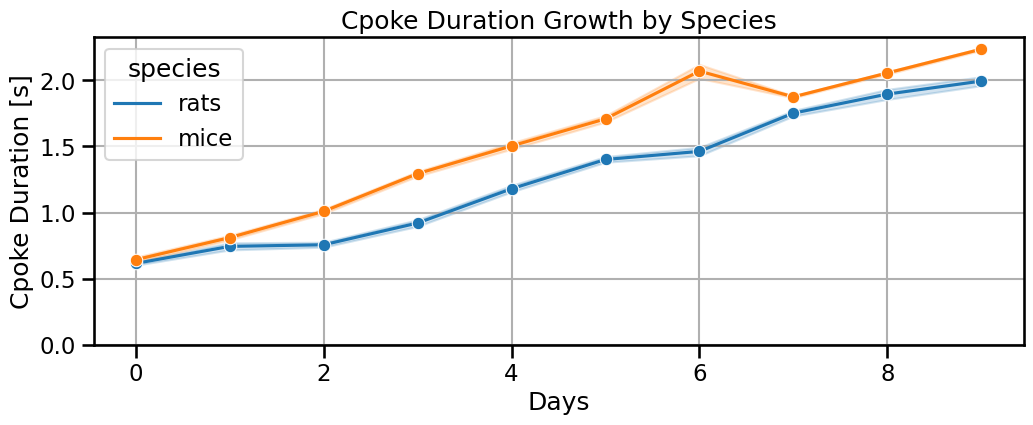

In [63]:
fig, ax = pu.make_fig()

sns.lineplot(
    data=cpoke_df.query("normalized_date < 10"),
    x="normalized_date",
    y="cpoke_dur",
    hue="species",
    marker="o",
    legend=True,
)

ax.grid()
_ = ax.set(
    xlabel="Days",
    ylabel="Cpoke Duration [s]",
    title="Cpoke Duration Growth by Species",
    ylim=(0),
)

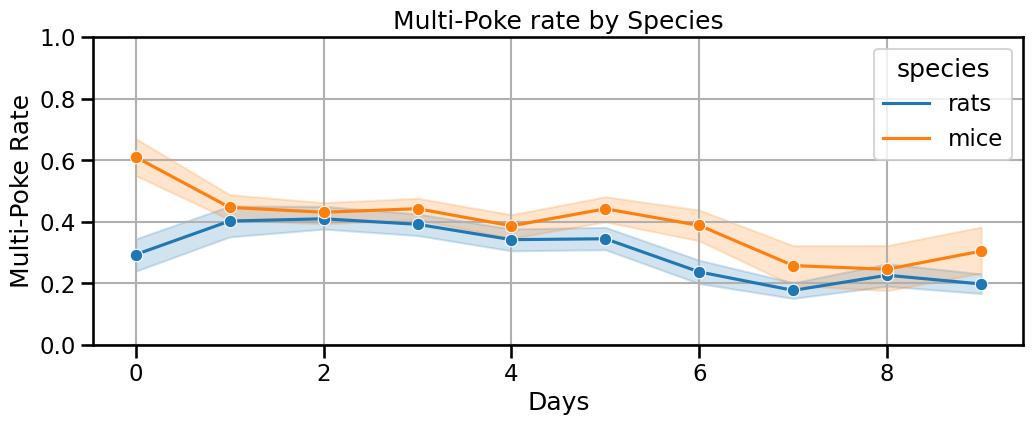

In [77]:
fig, ax = pu.make_fig()

sns.lineplot(
    data=cpoke_df.query("normalized_date < 10"),
    x="normalized_date",
    y="multi_cpoke",
    hue="species",
    marker="o",
    legend=True,
)

ax.grid()
_ = ax.set(
    xlabel="Days",
    ylabel="Multi-Poke Rate",
    title="Multi-Poke rate by Species",
    ylim=(0, 1),
)

In [89]:
cpoke_df.query("normalized_date < 10 and cpoke_dur < 1.5").groupby(
    "species"
).normalized_date.mean()

species
mice    2.260967
rats    3.186826
Name: normalized_date, dtype: float64

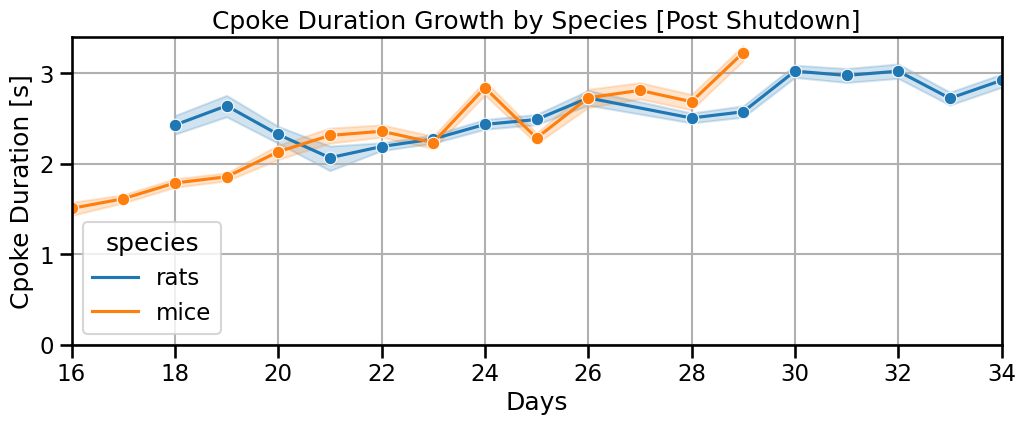

In [83]:
fig, ax = pu.make_fig()

sns.lineplot(
    data=cpoke_df.reset_index().query("stage > 7 and normalized_date > 15"),
    x="normalized_date",
    y="cpoke_dur",
    hue="species",
    marker="o",
    legend=True,
)

ax.grid()
_ = ax.set(
    xlabel="Days",
    ylabel="Cpoke Duration [s]",
    title="Cpoke Duration Growth by Species [Post Shutdown]",
    ylim=(0),
    xlim=(16, 34),
)

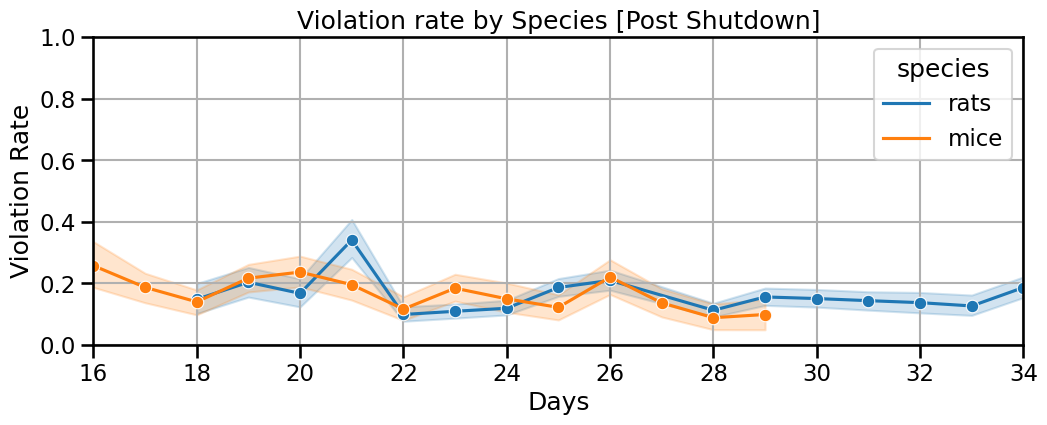

In [87]:
fig, ax = pu.make_fig()

sns.lineplot(
    data=cpoke_df.reset_index().query("stage > 7 and normalized_date > 15"),
    x="normalized_date",
    y="violations",
    hue="species",
    marker="o",
    legend=True,
)

ax.grid()
_ = ax.set(
    xlabel="Days",
    ylabel="Violation Rate",
    title="Violation rate by Species [Post Shutdown]",
    ylim=(0, 1),
    xlim=(16, 34),
)

In [ ]:
cpoke_d